# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

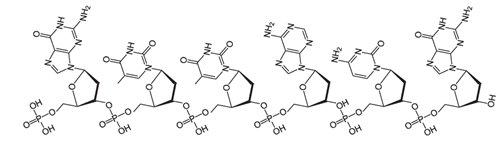

```markdown
On regarde sur la partie des bases azotées et on voit que la première et la dernière sont la Guanine -> G, la seconde et la troisième sont un Thymidine -> T, la quatrième est l'adénosine -> A. Donc on a : GTTACG

```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUAACCAAUAUGCAAGUACAUGCA – 5’


```markdown
Il faut d'abord lire la séquence dans la bonne direction :
5' - ACG UAC AUG AAC GUA UAA CCA AUA - 3'
      T   Y   M   N   V  stop P   I
On a donc MNV en partant d'un codon Start et un codon Stop.

```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
On a : TrpGluIleTyr -> WEIY
Ansi dans l'ordre on a : UGG | GAA GAG | AUA AUC AUU | UAU UAC

Donc si on veut toutes les combinaisons possibles on assemble les différents éléments ensemble entre chaque acide aminé comme par exemple : 5' UGG GAA AUA UAU 3', etc
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [3]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```markdown
C'est un format textuel permettant de représenter des séquences de nucléotides ou d'acides aminés (protéines), dans lequel les nucléotides ou les acides aminés sont représentés par des codes à une lettre. Ce format permet également de faire précéder les séquences de noms de séquences et de commentaires. Cette ligne de description commence par un '>' et donne un nom ou un identifiant unique à la séquence. Elle peut également contenir des informations supplémentaires.
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
C'est une séquence de trois nucléotides sur l'ARN messager qui code pour un acide aminé spécifique ou initie le départ ou l'arrêt de la traduction protéique.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Le codon Start est le AUG. Il code pour l'acide aminé Met(M).
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Pour les codons Stop on a : UGC, UAG ainsi que UAA et ils n'ont pas d'acide aminé associé.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
Dans le sens : 3' - 5'
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
L'ADN est sous forme de double hélice formée de 2 brins complémentaires avec pour chacun une séquence de nucléotides. Chaque nucléotide est composé d'une base azotée, d'un sucre (désoxyribose) et d'un groupe phosphate. Les bases azotées se lient spécifiquement par paires : l'adénine (A) avec la thymine (T) et la cytosine (C) avec la guanine (G). L'exterieur est le squelette - carbonne.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Les deux brins (brin codant et le brin matrice) de la molécule d'ADN peuvent porter un gène.
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
Un cadre de lecture est un mode de regroupement des nucléotides constituant la séquence d'un acide nucléique en triplets consécutifs, qui se succèdent sans interruption ni recouvrement.
Chaque brin d'ADN possède trois cadres de lecture possibles dans le sens 5' → 3' car l'ADN et l'ARN sont lus par triplets. Donc il y en a 6 pour une molécule d'ADN double brin.
```

###### Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
Un cadre de lecture est utilisé pour interpréter la séquence d'ADN lors de la traduction. Il permet de définir comment les nucléotides de l'ARNm sont lus en codons pour coder les acides aminées.
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [1]:
list_idx = []

def get_file_data(filepath):
    with open(filepath, 'r') as f:
        contents = f.readlines()
    del contents[0]
    result = ''
    for line in contents:
        result += line.strip()
    return result

def find_orfs(sequence):
    start_codon = 'ATG'
    stop_codons = ['TAA', 'TAG', 'TGA']
    orfs = []

    for i in range(len(sequence)):
        if sequence[i:i+3] == start_codon:
            for j in range(i+3, len(sequence), 3):
                if sequence[j:j+3] in stop_codons:
                    orfs.append((sequence[i:j+3], i, j + 2))
                    break
    return orfs

def reverse_complement(sequence):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    result = ''
    for base in reversed(sequence):
        result += complement[base]
    return result

def format_fasta(orfs):
    fasta_format = ""
    for orf, start, end, strand in orfs:
        fasta_format += f"> {start}, {end}, {strand}\n"
        fasta_format += f"{orf}\n"
    return fasta_format

filepath = './ncbi_dataset/data/GCA_000838645.1/GCA_000838645.1_ViralProj14060_genomic.fna'
sequence = get_file_data(filepath)

orfs_res = []
orfs = find_orfs(sequence)
if orfs:
    orfs_res.extend([(orf, start, end, "+") for orf, start, end in orfs])

reverse_sequence = reverse_complement(sequence)
orfs = find_orfs(reverse_sequence)
if orfs:
    orfs_res.extend([(orf, start, end, "-") for orf, start, end in orfs])

fasta_output = format_fasta(orfs_res)
print(fasta_output)

> 238, 270, +
ATGTGGTCACGCTGGGTATTTAAGCCCGAGTGA
> 320, 2185, +
ATGCCGGGGTTTTACGAGATTGTGATTAAGGTCCCCAGCGACCTTGACGAGCATCTGCCCGGCATTTCTGACAGCTTTGTGAACTGGGTGGCCGAGAAGGAATGGGAGTTGCCGCCAGATTCTGACATGGATCTGAATCTGATTGAGCAGGCACCCCTGACCGTGGCCGAGAAGCTGCAGCGCGACTTTCTGACGGAATGGCGCCGTGTGAGTAAGGCCCCGGAGGCCCTTTTCTTTGTGCAATTTGAGAAGGGAGAGAGCTACTTCCACATGCACGTGCTCGTGGAAACCACCGGGGTGAAATCCATGGTTTTGGGACGTTTCCTGAGTCAGATTCGCGAAAAACTGATTCAGAGAATTTACCGCGGGATCGAGCCGACTTTGCCAAACTGGTTCGCGGTCACAAAGACCAGAAATGGCGCCGGAGGCGGGAACAAGGTGGTGGATGAGTGCTACATCCCCAATTACTTGCTCCCCAAAACCCAGCCTGAGCTCCAGTGGGCGTGGACTAATATGGAACAGTATTTAAGCGCCTGTTTGAATCTCACGGAGCGTAAACGGTTGGTGGCGCAGCATCTGACGCACGTGTCGCAGACGCAGGAGCAGAACAAAGAGAATCAGAATCCCAATTCTGATGCGCCGGTGATCAGATCAAAAACTTCAGCCAGGTACATGGAGCTGGTCGGGTGGCTCGTGGACAAGGGGATTACCTCGGAGAAGCAGTGGATCCAGGAGGACCAGGCCTCATACATCTCCTTCAATGCGGCCTCCAACTCGCGGTCCCAAATCAAGGCTGCCTTGGACAATGCGGGAAAGATTATGAGCCTGACTAAAACCGCCCCCGACTACCTGGTGGGCCAGCAGCCCGTGGAGGACATTTCCAGCAATCGGATTTATAAAATTTTGGAACTAAACGGGTACGATCCCCAATATGCGG

Q10.	Combien d’ORFS trouvez-vous ?

In [2]:
print(len(orfs_res))

117


Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée par une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

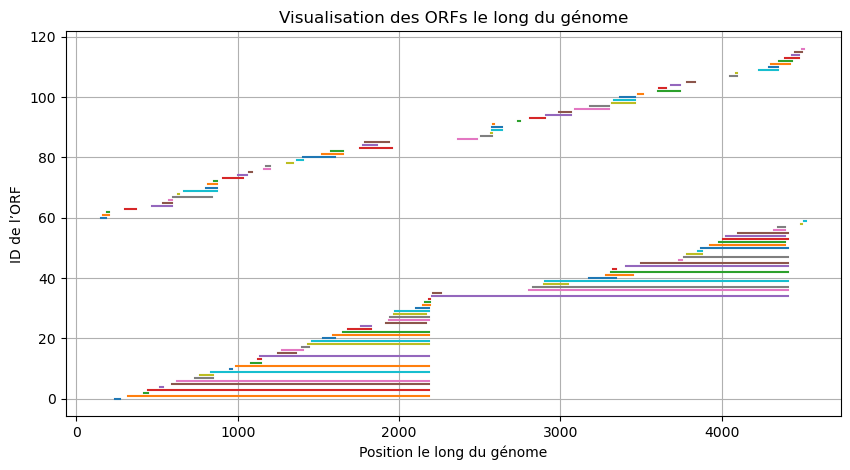

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

for idx, (_, start, end, strand) in enumerate(orfs_res):
    plt.plot([start, end], [idx, idx], label=f'ORF {idx+1} ({strand})')

plt.xlabel('Position le long du génome')
plt.ylabel('ID de l’ORF')
plt.title('Visualisation des ORFs le long du génome')
plt.grid(True)

plt.show()

Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
On sait qu'on a : P(A inter B inter C) = pA.pB.pC donc on aura pA.pT.pG.
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
Ainsi on va avoir pT.pA.pA + pT.pA.pG + pT.pG.pA
```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

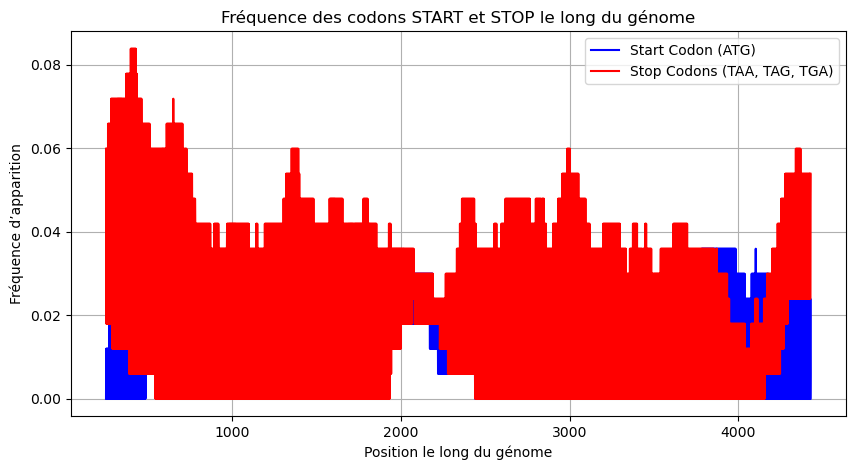

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def compute_codon_frequencies(sequence, window_size=501):
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    half_window = window_size // 2

    positions = []
    start_frequencies = []
    stop_frequencies = []

    for i in range(half_window, len(sequence) - half_window):
        window = sequence[i - half_window : i + half_window + 1]
        
        # Count codons occurences
        start_count = sum(1 for j in range(0, len(window) - 2, 3) if window[j:j+3] == start_codon)
        stop_count = sum(1 for j in range(0, len(window) - 2, 3) if window[j:j+3] in stop_codons)
        
        # freq normalized
        start_freq = start_count / (len(window) // 3)
        stop_freq = stop_count / (len(window) // 3)

        positions.append(i)
        start_frequencies.append(start_freq)
        stop_frequencies.append(stop_freq)

    return positions, start_frequencies, stop_frequencies

def plot_codon_frequencies(positions, start_freqs, stop_freqs):
    plt.figure(figsize=(10, 5))

    plt.plot(positions, start_freqs, label="Start Codon (ATG)", color="blue")
    plt.plot(positions, stop_freqs, label="Stop Codons (TAA, TAG, TGA)", color="red")

    plt.xlabel("Position le long du génome")
    plt.ylabel("Fréquence d’apparition")
    plt.title("Fréquence des codons START et STOP le long du génome")
    plt.legend()
    plt.grid(True)
    
    plt.show()

# Calcul des fréquences
positions, start_freqs, stop_freqs = compute_codon_frequencies(sequence)

# Affichage du graphe
plot_codon_frequencies(positions, start_freqs, stop_freqs)

Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

Q16. Qu’observez-vous ?

```markdown
Ils sont placés au niveau des 
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [3]:
def read_fasta(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    sequence = ""
    for line in lines:
        if not line.startswith(">"):
            sequence += line.strip().upper()
    return sequence

def count_codons(sequence):
    codon_counts = {}
    total_codons = 0

    # Parcours par groupes de 3 bases
    for i in range(0, len(sequence) - 2, 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:  # Vérification
            codon_counts[codon] = codon_counts.get(codon, 0) + 1
            total_codons += 1

    # Calcul des fréquences relatives
    codon_frequencies = {codon: count / total_codons for codon, count in codon_counts.items()}
    
    return codon_counts, codon_frequencies

genomes = {
    "AAV2": "NC_001401.fna",
    "Plasmodium_chr9": "AL844508.fna",
    "Ecoli_BL21": "NZ_CP053601.fna",
}

codon_data = {}
for name, file in genomes.items():
    sequence = read_fasta(file)
    counts, frequencies = count_codons(sequence)
    codon_data[name] = {"counts": counts, "frequencies": frequencies}

# Afficher les résultats
for genome, data in codon_data.items():
    print(f"Codon frequencies for {genome}:")
    for codon, freq in sorted(data["frequencies"].items()):
        print(f"{codon}: {freq:.5f}")  # Affichage avec 5 décimales
    print("\n")

Codon frequencies for AAV2:
AAA: 0.01604
AAC: 0.02886
AAG: 0.02181
AAT: 0.01988
ACA: 0.01860
ACC: 0.01988
ACG: 0.02181
ACT: 0.02053
AGA: 0.02630
AGC: 0.02437
AGG: 0.02181
AGT: 0.01155
ATA: 0.00385
ATC: 0.01732
ATG: 0.01475
ATT: 0.01347
CAA: 0.01026
CAC: 0.01026
CAG: 0.02758
CAT: 0.00641
CCA: 0.02758
CCC: 0.01732
CCG: 0.01924
CCT: 0.02117
CGA: 0.01155
CGC: 0.01347
CGG: 0.01219
CGT: 0.00577
CTA: 0.00257
CTC: 0.02053
CTG: 0.01668
CTT: 0.01155
GAA: 0.01347
GAC: 0.02630
GAG: 0.02181
GAT: 0.00706
GCA: 0.01539
GCC: 0.01860
GCG: 0.01796
GCT: 0.01026
GGA: 0.02951
GGC: 0.01668
GGG: 0.01155
GGT: 0.01732
GTA: 0.00641
GTC: 0.01219
GTG: 0.01732
GTT: 0.01026
TAA: 0.00513
TAC: 0.01796
TAG: 0.00385
TAT: 0.00385
TCA: 0.01924
TCC: 0.01155
TCG: 0.01411
TCT: 0.01796
TGA: 0.01604
TGC: 0.01283
TGG: 0.03079
TGT: 0.00513
TTA: 0.00385
TTC: 0.01604
TTG: 0.01283
TTT: 0.02181


Codon frequencies for Plasmodium_chr9:
AAA: 0.08111
AAC: 0.01311
AAG: 0.01567
AAT: 0.05336
ACA: 0.01812
ACC: 0.00547
ACG: 0.00308
ACT: 0.0

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

Codon frequencies for genome1:


<Figure size 1200x600 with 0 Axes>

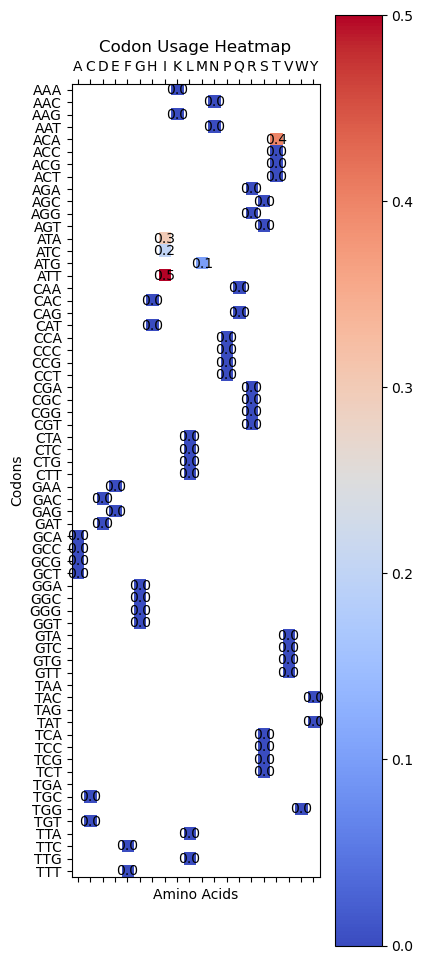

Codon frequencies for genome2:


<Figure size 1200x600 with 0 Axes>

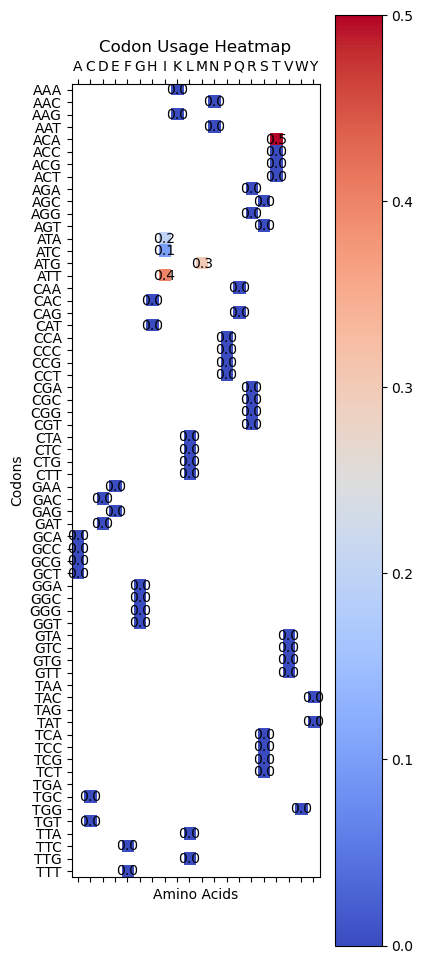

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_codon_heatmap(codon_frequencies, title="Codon Usage Heatmap"):

    # Get all unique amino acids (excluding stop codons "_")
    amino_acids = sorted(set(genecode.values()) - {"_"})

    # Get all codons
    codons = sorted(genecode.keys())

    # Create a matrix for heatmap data
    heatmap_data = []
    for codon in codons:
        aa = genecode[codon]
        row = [codon_frequencies.get(codon, 0) if genecode[codon] == aa else None for aa in amino_acids]
        heatmap_data.append(row)

    # Convert the data to a NumPy array for easier manipulation
    heatmap_data = np.array(heatmap_data, dtype=float)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    cax = plt.matshow(heatmap_data, cmap="coolwarm")

    # Add colorbar to the side
    plt.colorbar(cax)

    # Set axis labels and title
    plt.xlabel("Amino Acids")
    plt.ylabel("Codons")
    plt.title(title)

    # Set the ticks and labels
    plt.xticks(np.arange(len(amino_acids)), amino_acids)
    plt.yticks(np.arange(len(codons)), codons)

    # Annotate the matrix with the values
    for i in range(len(codons)):
        for j in range(len(amino_acids)):
            value = heatmap_data[i, j]
            if not np.isnan(value):  # Only annotate if value is not NaN
                plt.text(j, i, f'{value:.1f}', ha='center', va='center', color="black")

    plt.show()

# Example usage with codon data
for genome, data in codon_data.items():
    print(f"Codon frequencies for {genome}:")
    plot_codon_heatmap(data)


Q4. Ces heatmaps sont-elles similaires ?

```markdown
Il y a des différences entre ces 2 heatmaps.
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [11]:
def opti_codons(ADN_sequency, freq_table):
    codons = [ADN_sequency[i:i+3] for i in range(0, len(ADN_sequency), 3)]
    
    opti_sequence = []
    for codon in codons:
        amino_acid = genecode.get(codon)
        if (amino_acid):
            most_ref = freq_table[amino_acid][0]
            opti_sequence.append(most_ref)
        else:
            opti_sequence.append(codon)
    return ''.join(opti_sequence)


In [12]:
ADN_sequence = "ATGGTGCTTCTGTTGATGAAGGAGGAGGTTGTG"
freq_table = {
    'M': ['ATG'],
    'V': ['GTG', 'GTA', 'GTT', 'GTC'],
    'L': ['CTG', 'TTA', 'TTG', 'CTT', 'CTC', 'CTA'],
    'F': ['TTT', 'TTC'],
    'E': ['GAG', 'GAA'],
    'G': ['GGC', 'GGT', 'GGG', 'GGA'],
    'I': ['ATC', 'ATT', 'ATA'],
    'K': ['AAG', 'AAA'],
    'S': ['AGC', 'AGT', 'TCC', 'TCT', 'TCA', 'TCG'],
    '_': ['TAA', 'TAG', 'TGA']
}

optimized_sequence = opti_codons(ADN_sequence, freq_table)
print("Optimized DNA Sequence:", optimized_sequence)

Optimized DNA Sequence: ATGGTGCTGCTGCTGATGAAGGAGGAGGTGGTG


Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [16]:
# Download genome
def download_genome(genome_id, url):
    url = f"url/{genome_id}.fasta"
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        raise Exception("Failed to download genome")

In [20]:

def calculate_codon_frequency(genome_sequence):

    codon_count = {aa: {codon: 0 for codon in codons if genecode[codon] == aa} for aa in set(genetic_code.values())}

    for i in range(0, len(genome_sequence) - 2, 3):
        codon = genome_sequence[i:i+3]
        if codon in genecode:
            aa = genetic_code[codon]
            codon_count[aa][codon] += 1

    freq_table = {}
    for aa, codons in codon_count.items():
        sorted_codons = sorted(codons.keys(), key=lambda x: codons[x], reverse=True)
        freq_table[aa] = sorted_codons

    return freq_table

In [ ]:
# Replace with the correct URL
url = "test"
genome_id = ""

# Step 1: Download the genome sequence
genome_sequence = download_genome(genome_id, url)

# Step 2: Calculate the codon frequency table
freq_table = calculate_codon_frequency(genome_sequence)

# Step 3: Optimize the input DNA sequence
optimized_sequence = opti_codons(ADN_sequence, freq_table)

print("Optimized DNA Sequence:", optimized_sequence)